In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_evrate_genie_other_mar18/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_flux_momentum.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Flux variation, systematic

In [4]:
# Load input files
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)

try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"genie_other_systematic.root","RECREATE");


In [5]:
#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
#pot_overlay= 1.22339196540357653e+21
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.26811760704e+21
Overlay:	1.26811760704e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0060278320856
Dirt:		0.0611423668132


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [7]:
if 1:
    filename_overlay = 'NuCCana_overlay_V26_mar18_noflux.rootout4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
'''track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
'''
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)


True

In [12]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [13]:
#weight_list = {}
'''weight_list_all = [ 'All_Genie', 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'TunedCentralValue_Genie',\
    'VecFFCCQEshape_Genie', 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation', 'splines_general_Spline' ]'''

#weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
#    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
#    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
#    'piplus_PrimaryHadronSWCentralSplineVariation' ]
#weight_list_flux = [ 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'VecFFCCQEshape_Genie' ]
weight_list_flux = [ 'AxFFCCQEshape_UBGenie', 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
               'RPA_CCQE_Reduced_UBGenie','RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
                'VecFFCCQEshape_UBGenie' ]

#weight_list_flux = [ 'AxFFCCQEshape_UBGenie', 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
#               'RPA_CCQE_Reduced_UBGenie','RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
#                'VecFFCCQEshape_UBGenie','XSecShape_CCMEC_UBGenie' ]

num_para = len(weight_list_flux)
print 'Nuber of parameters: ',num_para
#weight_list_genie_other = [ 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'VecFFCCQEshape_Genie' ]

Nuber of parameters:  9


In [14]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
num_universes = 2
eff_uni = np.zeros((num_para,num_universes))
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [15]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

def draw_adding_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [16]:
#path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_genie_other/pc46/script_output/'
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted/xsec_genie_evrate_mar18/'
f = ROOT.TFile.Open(path+"Genie_other_evrates.root", 'read')
#h_data_mom = f.Get("h_data_mom")
#h_data_mom.Draw()
#c1.Draw()
#h_data_mom.GetEntries()

In [17]:

h_ext_mom = f.Get("h_ext_mom")
h_data_mom = f.Get("h_data_mom")
h_dirt_mom = f.Get("h_dirt_mom")

bkg_ext = h_ext_mom.Integral(0,binnum+1)
num_data = h_data_mom.Integral(0,binnum+1)
bkg_dirt = h_dirt_mom.Integral(1,binnum)
print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt
bkg_dirt = h_dirt_mom.Integral(0,binnum+1)
print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt
bkg_dirt = h_dirt_mom.Integral(-1,binnum+1)
print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt
#bkg_dirt = h_dirt_mom.GetSumOfWeights()
#print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt
sum = 0.0
for i in range(0,binnum+2):
    print i,h_dirt_mom.GetBinContent(i)
    sum = sum+h_dirt_mom.GetBinContent(i)
print sum

Data:  1348.0  Ext:  142.179031156  Dirt:  31.9965575933
Data:  1348.0  Ext:  142.179031156  Dirt:  32.1298251934
Data:  1348.0  Ext:  142.179031156  Dirt:  32.1298251934
0 0.0721252337098
1 1.26834332943
2 9.92968463898
3 8.45454597473
4 7.7088098526
5 2.58323383331
6 2.05193996429
7 0.0611423663795
32.1298251934


In [18]:
weight_list = [ 'AxFFCCQEshape_UBGenie', 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
               'RPA_CCQE_Reduced_UBGenie','RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
                'VecFFCCQEshape_UBGenie']#,'XSecShape_CCMEC_UBGenie']
num_universes = 2


In [19]:
'''h_para = []
for para in range(num_para):
    h_para.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_para[para].append( f.Get('TrackMom_MCS_bkg_all['+str(para)+']['+str(uni)+']') ) '''

"h_para = []\nfor para in range(num_para):\n    h_para.append([])\n    for uni in range(num_universes):\n        #print 'At universe: ',uni\n        h_para[para].append( f.Get('TrackMom_MCS_bkg_all['+str(para)+']['+str(uni)+']') ) "

In [20]:

def plot_ev_ratio(para_name,XAxisTitle):
    legend = ROOT.TLegend(0.52,0.15,0.9,0.9); #LEGEND RIGHT
    #legend = ROOT.TLegend(0.15,0.55,0.3,0.9); #LEGEND LEFT
    h_data_mom = f.Get(para_name+"dat")
    h_ext_mom = f.Get(para_name+"ext")
    h_dirt_mom = f.Get(para_name+"dirt")
    h_dat = h_data_mom.Clone()
    h_dat.Add(h_ext_mom,-1)
    h_dat.Add(h_dirt_mom,-1)
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)
    #c1.SetFillStyle(4000);
    # first pad
    c1.cd()
    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)
    h_para = []
    h_dat
    h_dat.GetYaxis().SetLabelSize(0.06);
    h_dat.GetYaxis().SetTitleSize(0.06);
    h_dat.GetYaxis().SetTitleOffset(0.8);
    h_dat.GetXaxis().SetLabelOffset(999);
    h_dat.GetXaxis().SetTitleOffset(999);
    h_dat.GetXaxis().SetLabelSize(0);
    h_dat.GetXaxis().SetTitleSize(0);
    #h_covariance.SetLineColor(ROOT.kBlack)
    h_dat.SetLineWidth(4)
    ROOT.gStyle.SetEndErrorSize(5)
    h_dat.Draw('E1')
    legend.Draw()
                
    for para in range(num_para):
        h_para.append([])
        for uni in range(num_universes):
            #print 'At universe: ',uni
            h_para[para].append( f.Get(para_name+'['+str(para)+']['+str(uni)+']') )     
            h_para[para][uni].SetLineColorAlpha(para+1,0.8)
            h_para[para][uni].SetLineWidth(4)
            if (para+1)==10:
                h_para[para][uni].SetLineColorAlpha(30,0.8)
            if para ==0 and uni == 0:
                legend.AddEntry(h_para[para][uni],'Central Value',"f")
            elif uni == 0:
                legend.AddEntry(h_para[para][uni],weight_list[para],"f")
            h_para[para][uni].SetYTitle("Number of entries")
            h_para[para][uni].SetXTitle(XAxisTitle)
            '''if para == 0 and uni == 0:
                h_para[para][uni].GetYaxis().SetLabelSize(0.06);
                h_para[para][uni].GetYaxis().SetTitleSize(0.06);
                h_para[para][uni].GetYaxis().SetTitleOffset(0.8);
                h_para[para][uni].GetXaxis().SetLabelOffset(999);
                h_para[para][uni].GetXaxis().SetTitleOffset(999);
                h_para[para][uni].GetXaxis().SetLabelSize(0);
                h_para[para][uni].GetXaxis().SetTitleSize(0);
                #h_covariance.SetLineColor(ROOT.kBlack)
                h_para[para][uni].SetLineWidth(4)
                ROOT.gStyle.SetEndErrorSize(5)
                h_para[para][uni].Draw('hist')
                legend.Draw()
            else:
                h_para[para][uni].Draw("hist same")'''
            h_para[para][uni].Draw("hist same")
    h_para[0][0].SetLineColor(ROOT.kBlack)
    h_para[0][0].Draw("hist same")
    h_dat.SetLineColor(ROOT.kBlack)
    h_dat.SetLineWidth(4)
    h_dat.Draw('E1 same')
    prelim, pot_tex = draw_adding_ratio()
    prelim.Draw()
    pot_tex.Draw()

    c1.cd()
    h_para[0][0].GetXaxis().SetLabelOffset(0);
    h_para[0][0].GetXaxis().SetTitleOffset(0);
    #h_data.GetXaxis().SetLabelSize(0.06);
    #pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    h_para_ratio = []
    h_dat_ratio = h_para[0][0].Clone()
    h_dat_ratio.Divide(h_dat)
    h_dat_ratio.Draw('E1 same')
    h_dat_ratio.SetYTitle('Data/(Ext+MC)')
    h_dat_ratio.GetYaxis().SetTitleSize(0.1)
    h_dat_ratio.GetYaxis().SetTitleOffset(0.3)
    h_dat_ratio.GetYaxis().SetLabelSize(0.07)

    h_dat_ratio.GetXaxis().SetTitleSize(0.15)
    h_dat_ratio.GetXaxis().SetLabelSize(0.15)
    h_dat_ratio.GetXaxis().SetTitleOffset(1)
    h_dat_ratio.SetMinimum(0.0)
    h_dat_ratio.SetMaximum(2.0)
    h_dat_ratio.Draw('E1')
    
    for para in range(num_para):
        h_para_ratio.append([])
        for uni in range(num_universes):
            h_para_ratio[para].append(h_para[0][0].Clone())
            h_para_ratio[para][uni].Divide(h_para[para][uni])
            h_para_ratio[para][uni].SetLineColorAlpha(para+1,0.8)
            if (para+1)==10:
                h_para_ratio[para][uni].SetLineColorAlpha(30,0.8)
            '''if para ==0 and uni==0:
                h_para_ratio[para][uni].SetYTitle('Data/(Ext+MC)')
                h_para_ratio[para][uni].GetYaxis().SetTitleSize(0.1)
                h_para_ratio[para][uni].GetYaxis().SetTitleOffset(0.3)
                h_para_ratio[para][uni].GetYaxis().SetLabelSize(0.07)

                h_para_ratio[para][uni].GetXaxis().SetTitleSize(0.15)
                h_para_ratio[para][uni].GetXaxis().SetLabelSize(0.15)
                h_para_ratio[para][uni].GetXaxis().SetTitleOffset(1)
                h_para_ratio[para][uni].SetMinimum(0.9)
                h_para_ratio[para][uni].SetMaximum(1.1)
                h_para_ratio[para][uni].Draw('hist')
            else:
                h_para_ratio[para][uni].Draw('hist same')'''
            h_para_ratio[para][uni].Draw('hist same')

    h_dat_ratio.Draw('E1 same')
    c1.Draw()

    c1.SaveAs(outputdir_png + 'h_'+para_name+'_ratio.png')
    c1.SaveAs(outputdir_pdf + 'h_'+para_name+'_ratio.pdf')
    c1.SaveAs(outputdir_root + 'h_'+para_name+'_ratio.root')

    #h_para.clear()
    #h_para_ratio.clear()
    return

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_evrate_genie_other_mar18/png/h_TrackMom_MCS_pre_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_evrate_genie_other_mar18/pdf/h_TrackMom_MCS_pre_ratio.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_evrate_genie_other_mar18/root/h_TrackMom_MCS_pre_ratio.root has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_evrate_genie_other_mar18/png/h_TrackMom_range_pre_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_evrate_genie_other_mar18/pdf/h_TrackMom_range_pre_ratio.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Deskt

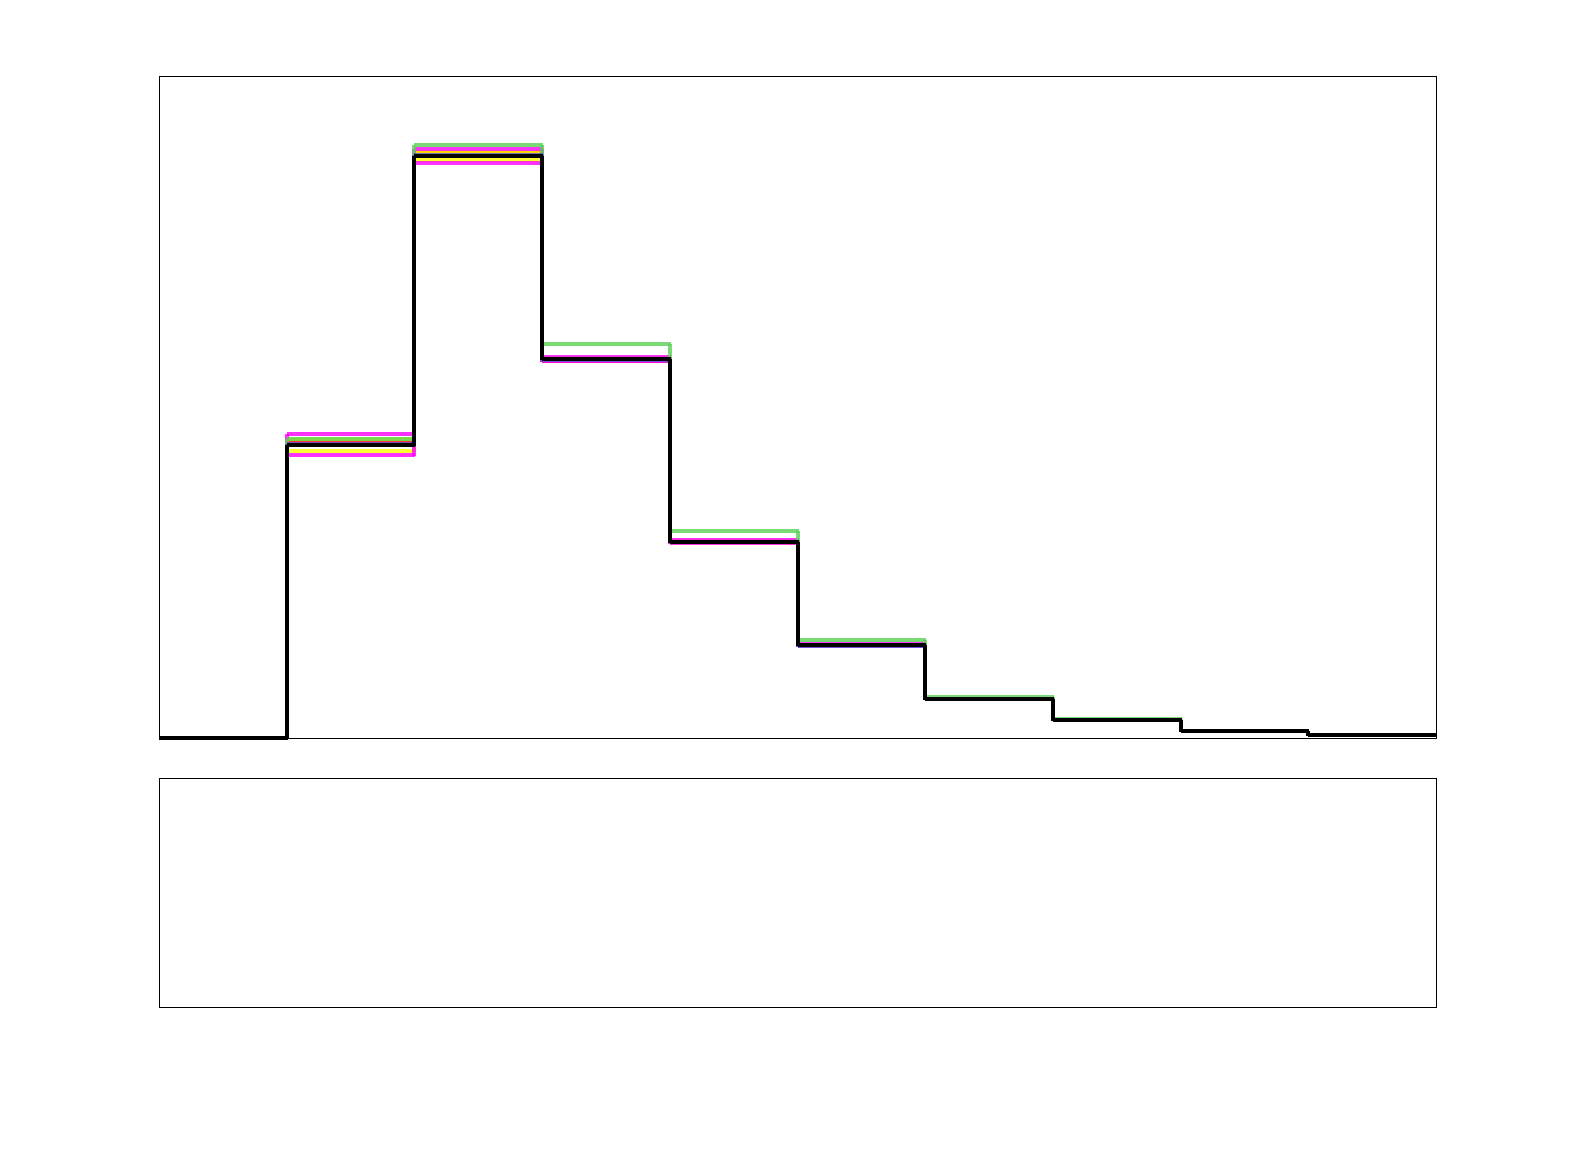

In [21]:
add_name = '_pre'

plot_ev_ratio('TrackMom_MCS'+add_name,'Muon momentum MCS [GeV]')
plot_ev_ratio('TrackMom_range'+add_name,'Muon momentum range [GeV]')
plot_ev_ratio('NuVx_sce'+add_name,'Reco. Nu vertex X position [cm]')
plot_ev_ratio('NuVy_sce'+add_name,'Reco. Nu vertex Y position [cm]')
plot_ev_ratio('NuVz_sce'+add_name,'Reco. Nu vertex Z position [cm]')
plot_ev_ratio('cosTheta'+add_name,'cos(Theta)')
plot_ev_ratio('PID_chiproton'+add_name,'Proton PID')
plot_ev_ratio('PIDmupion_ration'+add_name,'TrackPID_chimuon/TrackPID_chipion')
plot_ev_ratio('PIDmuprot_ration'+add_name,'TrackPID_chimuon/TrackPID_chiproton')
plot_ev_ratio('nr_crthit_top'+add_name,'Nr CRTHits in Top')
plot_ev_ratio('CRTVertexcut'+add_name,'Number of CRT hits upstream of vertex')
plot_ev_ratio('TrackScore'+add_name,'Track Score')
plot_ev_ratio('NuScore'+add_name,'Topological Score')
plot_ev_ratio('NuTracks'+add_name,'Number of tracks')
plot_ev_ratio('NumPfp'+add_name,'Number of PFparticles')


In [ ]:
add_name = '_all'

#plot_ev_ratio('TrackMom_MCS'+add_name,'Muon momentum MCS [GeV]')
#plot_ev_ratio('TrackMom_range'+add_name,'Muon momentum range [GeV]')
#plot_ev_ratio('NuVx_sce'+add_name,'Reco. Nu vertex X position [cm]')
#plot_ev_ratio('NuVy_sce'+add_name,'Reco. Nu vertex Y position [cm]')
#plot_ev_ratio('NuVz_sce'+add_name,'Reco. Nu vertex Z position [cm]')
#plot_ev_ratio('cosTheta'+add_name,'cos(Theta)')
plot_ev_ratio('PID_chiproton'+add_name,'Proton PID')
plot_ev_ratio('PIDmupion_ration'+add_name,'TrackPID_chimuon/TrackPID_chipion')
plot_ev_ratio('PIDmuprot_ration'+add_name,'TrackPID_chimuon/TrackPID_chiproton')
plot_ev_ratio('nr_crthit_top'+add_name,'Nr CRTHits in Top')
plot_ev_ratio('CRTVertexcut'+add_name,'Number of CRT hits upstream of vertex')
plot_ev_ratio('TrackScore'+add_name,'Track Score')
plot_ev_ratio('NuScore'+add_name,'Topological Score')
plot_ev_ratio('NuTracks'+add_name,'Number of tracks')
plot_ev_ratio('NumPfp'+add_name,'Number of PFparticles')
